In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import poisson

data = pd.read_csv('statistics_135_2021.csv')
header=data.columns
df=pd.DataFrame(data,columns=header)
df=df.fillna(0)

In [2]:
group_keys=df.home_id
matches_home=df['match_id'].groupby(group_keys).count()
matches_home_list=matches_home.tolist()
matches_away=df['match_id'].groupby(group_keys).count()
matches_away_list=matches_away.tolist()
home_id=df['home_id'].groupby(group_keys).count()
home_id_list=home_id.index.tolist()
away_id=df['away_id'].groupby(group_keys).count()
away_id_list=away_id.index.tolist()

In [3]:
home_total_goals=df['home'].groupby(group_keys).sum()
home_total_goals_list=home_total_goals.tolist()
home_total_goals_contra=df['away'].groupby(group_keys).sum()
home_total_goals_contra_list=home_total_goals_contra.tolist()
home_total_shot=df['home_total_shots'].groupby(group_keys).sum()
home_total_shot_list=home_total_shot.tolist()
home_shots_on_goal=df['home_shots_on_goal'].groupby(group_keys).sum()
home_shots_on_goal_list=home_shots_on_goal.tolist()
home_shots_insidebox=df['home_shots_insidebox'].groupby(group_keys).sum()
home_shots_insidebox_list=home_shots_insidebox.tolist()

away_total_goals=df['away'].groupby(group_keys).sum()
away_total_goals_list=away_total_goals.tolist()
away_total_goals_contra=df['home'].groupby(group_keys).sum()
away_total_goals_contra_list=away_total_goals_contra.tolist()
away_total_shot=df['away_total_shots'].groupby(group_keys).sum()
away_total_shot_list=away_total_shot.tolist()
away_shots_on_goal=df['away_shots_on_goal'].groupby(group_keys).sum()
away_shots_on_goal_list=away_shots_on_goal.tolist()
away_shots_insidebox=df['away_shots_insidebox'].groupby(group_keys).sum()
away_shots_insidebox_list=away_shots_insidebox.tolist()

In [4]:
df_home=pd.DataFrame({'id':home_id_list, 'matches':matches_home_list, 'total goals':home_total_goals_list,'total goals contra':home_total_goals_contra_list,'total shots':home_total_shot_list,'shots on goal':home_shots_on_goal_list,'shots inside box':home_shots_insidebox_list})
df_home

,id,matches,total goals,total goals contra,total shots,shots on goal,shots inside box
0,487.0,19,42.0,25.0,261.0,104.0,164.0
1,488.0,19,27.0,30.0,297.0,106.0,166.0
2,489.0,19,28.0,12.0,310.0,86.0,190.0
3,490.0,19,20.0,33.0,229.0,66.0,145.0
4,492.0,19,37.0,16.0,337.0,109.0,205.0
5,494.0,19,31.0,29.0,254.0,87.0,158.0
6,495.0,19,14.0,25.0,223.0,60.0,129.0
7,496.0,19,25.0,14.0,280.0,86.0,181.0
8,497.0,19,26.0,16.0,309.0,98.0,185.0
9,498.0,19,29.0,32.0,216.0,71.0,143.0


In [5]:
df_away=pd.DataFrame({'id':away_id_list, 'matches':matches_away_list, 'total goals':away_total_goals_list,'total goals contra':away_total_goals_contra_list,'total shots':away_total_shot_list,'shots on goal':away_shots_on_goal_list,'shots inside box':away_shots_insidebox_list})
df_away

,id,matches,total goals,total goals contra,total shots,shots on goal,shots inside box
0,487.0,19,25.0,42.0,214.0,74.0,141.0
1,488.0,19,30.0,27.0,230.0,89.0,162.0
2,489.0,19,12.0,28.0,175.0,57.0,107.0
3,490.0,19,33.0,20.0,261.0,82.0,160.0
4,492.0,19,16.0,37.0,184.0,61.0,109.0
5,494.0,19,29.0,31.0,213.0,73.0,147.0
6,495.0,19,25.0,14.0,251.0,86.0,163.0
7,496.0,19,14.0,25.0,188.0,52.0,94.0
8,497.0,19,16.0,26.0,180.0,67.0,108.0
9,498.0,19,32.0,29.0,246.0,91.0,166.0


In [6]:
shots_inside_home=df_home['total goals']/df_home['shots inside box']
shots_on_goal_home=df_home['total goals']/df_home['shots on goal']
total_shots_home=df_home['total goals']/df_home['total shots']

In [7]:
shots_inside_away=df_away['total goals']/df_away['shots inside box']
shots_on_goal_away=df_away['total goals']/df_away['shots on goal']
total_shots_away=df_away['total goals']/df_away['total shots']

In [8]:
goals_home_av=df_home['total goals']/matches_home_list
goals_contra_home_av=df_home['total goals contra']/matches_home_list

In [9]:
goals_away_av=df_away['total goals']/matches_away_list
goals_contra_away_av=df_away['total goals contra']/matches_away_list

In [10]:
df_home_stats=pd.DataFrame({'id':home_id_list,'average goals per match':goals_home_av,'average goals contra per match':goals_contra_home_av.tolist(),'goals per shots inside box':shots_inside_home.tolist(),'goals per shots on goal':shots_on_goal_home.tolist(),'goals per total shots':total_shots_home.tolist()})


In [11]:
stats_home=df_home_stats.describe()


In [12]:
df_away_stats=pd.DataFrame({'id':away_id_list,'average goals per match':goals_away_av,'average goals contra per match':goals_contra_away_av.tolist(),'goals per shots inside box':shots_inside_away.tolist(),'goals per shots on goal':shots_on_goal_away.tolist(),'goals per total shots':total_shots_away.tolist()})


In [13]:
stats_away=df_away_stats.describe()


[array([[8.68962077]]), array([0.04363528]), 0.469575446163666]


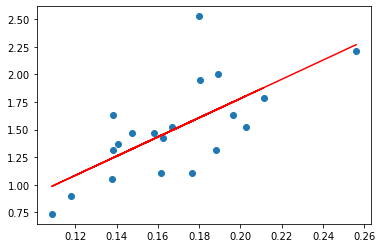

In [14]:
Y = df_home_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_home_stats['goals per shots inside box'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_shotinsidebox=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_shotsinsidebox=Y-Y_pred
dif_av_goals_per_shotsinsidebox=[dif_shotsinsidebox.mean(),dif_shotsinsidebox.min(),dif_shotsinsidebox.max()]
print(m_shotinsidebox)

[array([[4.84239641]]), array([-0.05085622]), 0.2731557669925181]


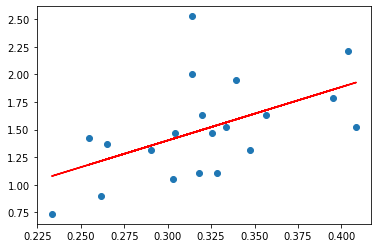

In [15]:
Y = df_home_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_home_stats['goals per shots on goal'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_shotsongoal=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_shotongoal=Y-Y_pred
dif_av_goals_per_shotongoal=[dif_shotongoal.mean(),dif_shotongoal.min(),dif_shotongoal.max()]
print(m_shotsongoal)

[array([[14.12081293]]), array([0.0031907]), 0.5928300116254094]


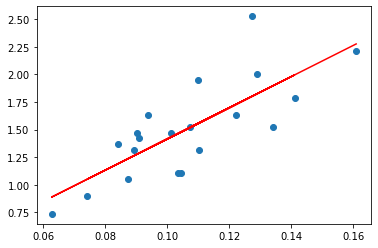

In [16]:
Y = df_home_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_home_stats['goals per total shots'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_totalshots=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_totalshots=Y-Y_pred
dif_av_goals_per_totalshots=[dif_totalshots.mean(),dif_totalshots.min(),dif_totalshots.max()]
print(m_totalshots)

[array([[8.61840291]]), array([-0.18483793]), 0.4295023999023384]


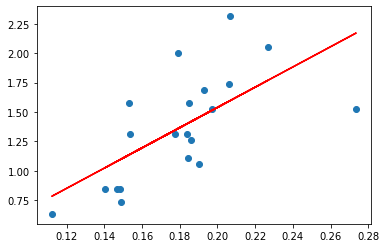

In [17]:
Y = df_away_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_away_stats['goals per shots inside box'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_shotinsidebox_away=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_shotsinsidebox_away=Y-Y_pred
dif_av_goals_per_shotsinsidebox_away=[dif_shotsinsidebox_away.mean(),dif_shotsinsidebox_away.min(),dif_shotsinsidebox_away.max()]
print(m_shotinsidebox_away)

[array([[6.54874919]]), array([-0.73475211]), 0.5920041980415982]


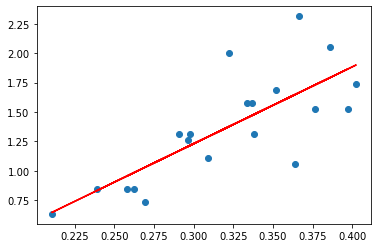

In [18]:
Y = df_away_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_away_stats['goals per shots on goal'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_shotsongoal_away=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_shotongoal_away=Y-Y_pred
dif_av_goals_per_shotongoal_away=[dif_shotongoal_away.mean(),dif_shotongoal_away.min(),dif_shotongoal_away.max()]
print(m_shotsongoal_away)

[array([[13.40790712]]), array([-0.15198605]), 0.5335970573490113]


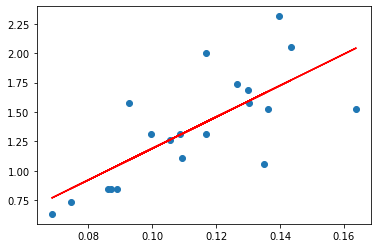

In [19]:
Y = df_away_stats['average goals per match'].values.reshape(-1, 1)  # values converts it into a numpy array
X = df_away_stats['goals per total shots'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X,Y)
plt.plot(X,Y_pred,'-r')
m_totalshots_away=[linear_regressor.coef_,linear_regressor.intercept_,linear_regressor.score(X,Y)]
dif_totalshots_away=Y-Y_pred
dif_av_goals_per_totalshots_away=[dif_totalshots_away.mean(),dif_totalshots_away.min(),dif_totalshots_away.max()]
print(m_totalshots_away)

In [20]:
atack_home=df_home_stats['average goals per match']/stats_home['average goals per match'][1]

In [21]:
atack_away=df_away_stats['average goals per match']/stats_away['average goals per match'][1]

In [22]:
defense_home=df_home_stats['average goals contra per match']/stats_home['average goals contra per match'][1]

In [23]:
defense_away=df_away_stats['average goals contra per match']/stats_away['average goals contra per match'][1]

In [30]:
df_coeff=pd.DataFrame({'id':home_id_list,'atack home':atack_home.tolist(),'atack away':atack_away.tolist(),'defense home':defense_home.tolist(),'defense away':defense_away.tolist()})
df_coeff

,id,atack home,atack away,defense home,defense away
0,487.0,1.471103,0.965251,0.965251,1.471103
1,488.0,0.945709,1.158301,1.158301,0.945709
2,489.0,0.980736,0.463320,0.463320,0.980736
3,490.0,0.700525,1.274131,1.274131,0.700525
4,492.0,1.295972,0.617761,0.617761,1.295972
5,494.0,1.085814,1.119691,1.119691,1.085814
6,495.0,0.490368,0.965251,0.965251,0.490368
7,496.0,0.875657,0.540541,0.540541,0.875657
8,497.0,0.910683,0.617761,0.617761,0.910683
9,498.0,1.015762,1.235521,1.235521,1.015762


In [31]:
coeff_stats=df_coeff.describe()
coeff_stats

,id,atack home,atack away,defense home,defense away
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,499.800000,1.000000,1.000000,1.000000,1.000000
std,9.099451,0.292935,0.340741,0.340741,0.292935
min,487.000000,0.490368,0.463320,0.463320,0.490368
25%,493.500000,0.840630,0.733591,0.733591,0.840630
50%,498.500000,0.980736,0.965251,0.965251,0.980736
75%,504.250000,1.112084,1.177606,1.177606,1.112084
max,517.000000,1.681261,1.698842,1.698842,1.681261


In [38]:
matrix_goles_home=pd.DataFrame()
matrix_goles_away=pd.DataFrame()
ind=list(range(0,len(df_home)))
for i in ind:
    matrix_goles_home[ind[i]]=df_coeff['atack home'][ind[i]]*df_coeff['defense away'][:]*stats_home['average goals per match'][1]
    matrix_goles_away[ind[i]]=df_coeff['atack away'][ind[i]]*df_coeff['defense home'][:]*stats_away['average goals per match'][1]


In [39]:
matrix_goles_home.columns=home_id_list
matrix_goles_home.index=home_id_list
matrix_goles_away.columns=away_id_list
matrix_goles_away.index=away_id_list

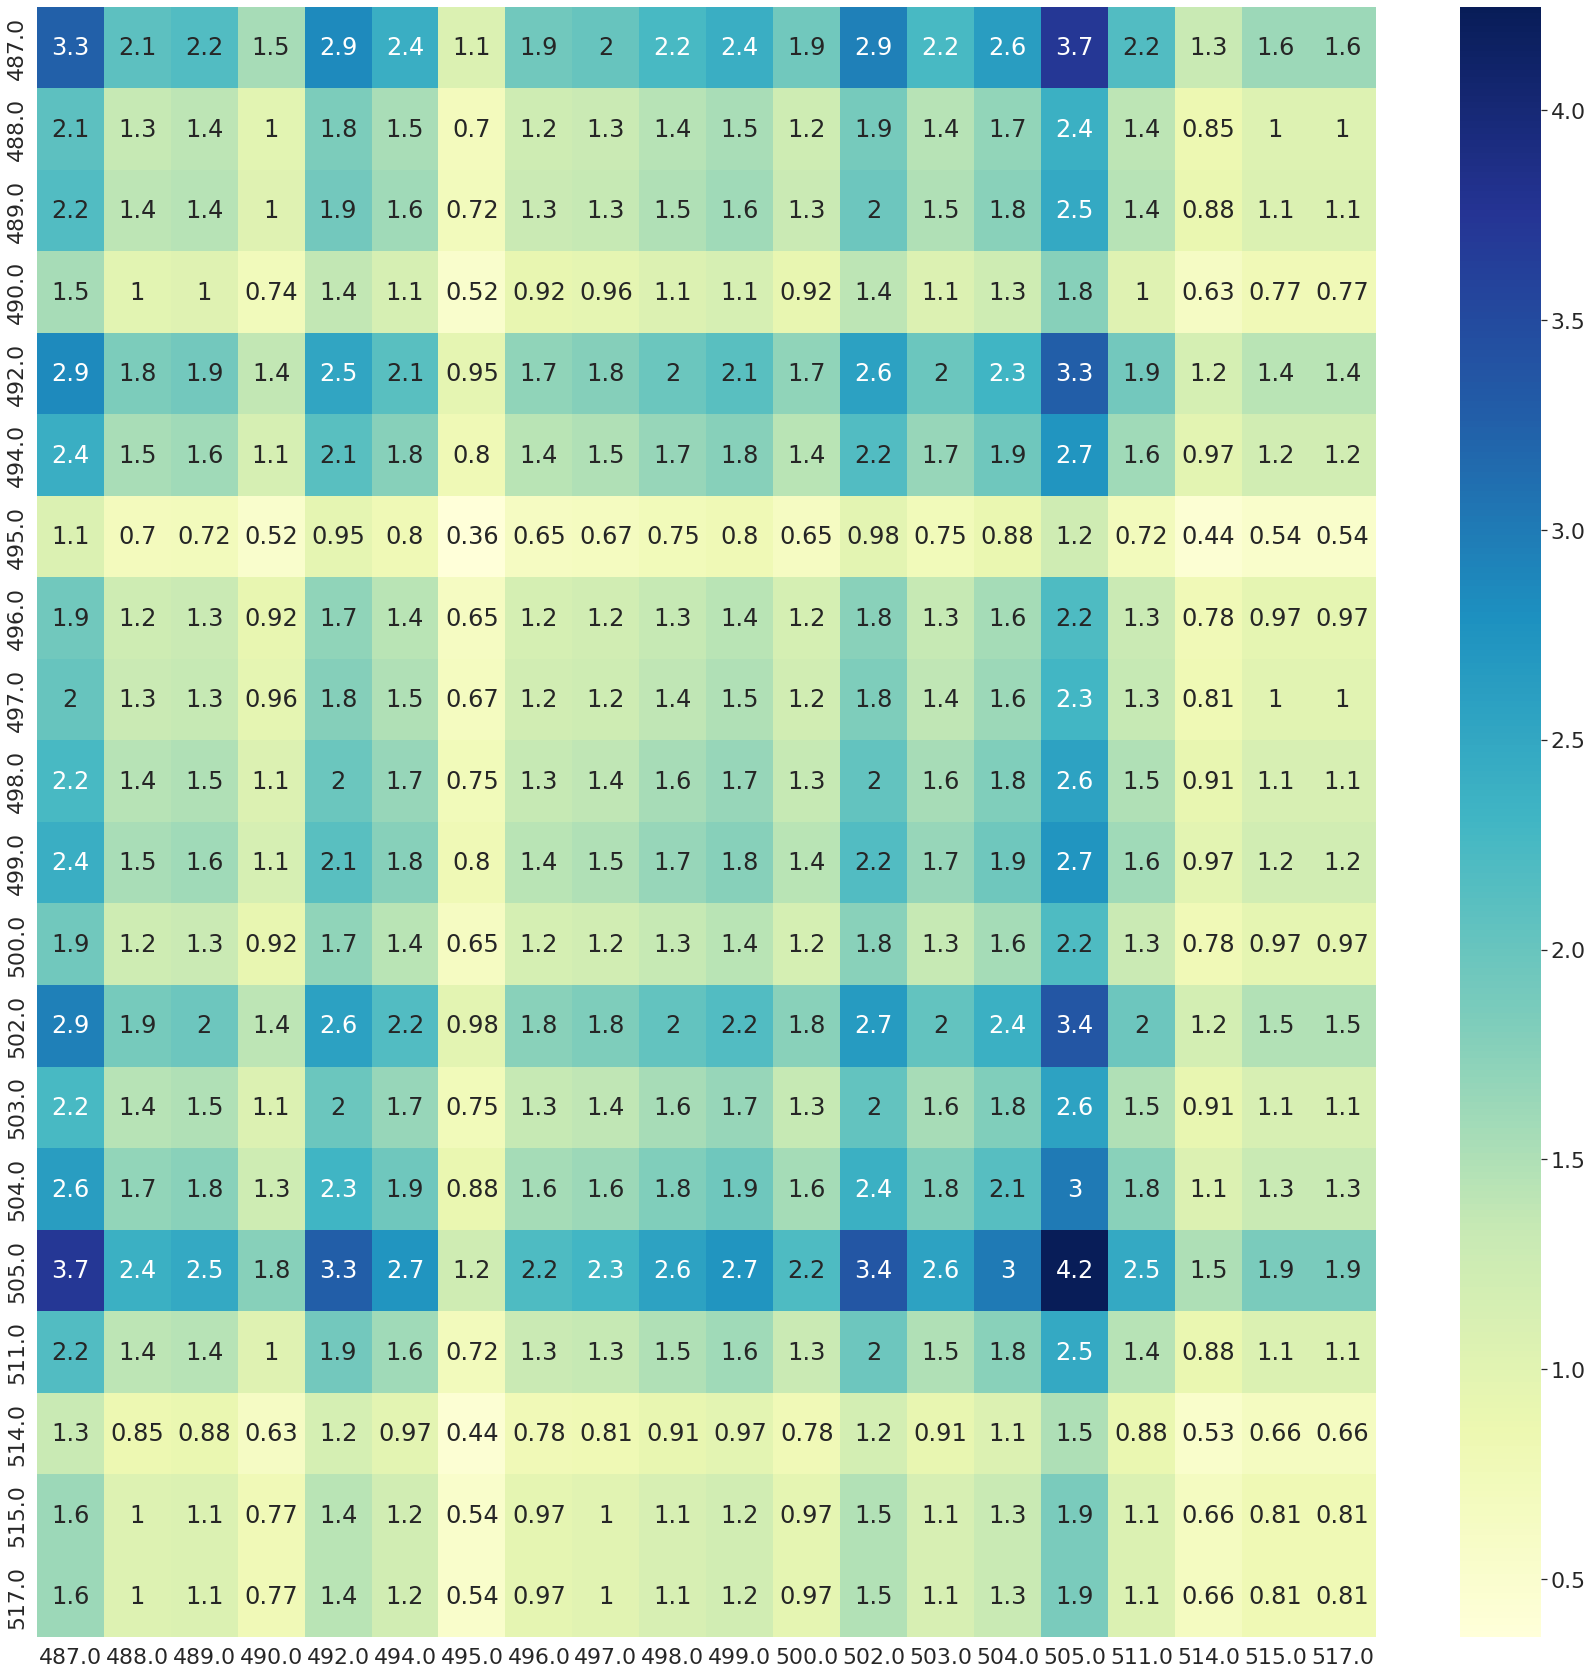

In [40]:
plt.figure(figsize = (30,30))
sns.set(font_scale=2)
figure=sns.heatmap(matrix_goles_home,cmap='YlGnBu',annot=True)

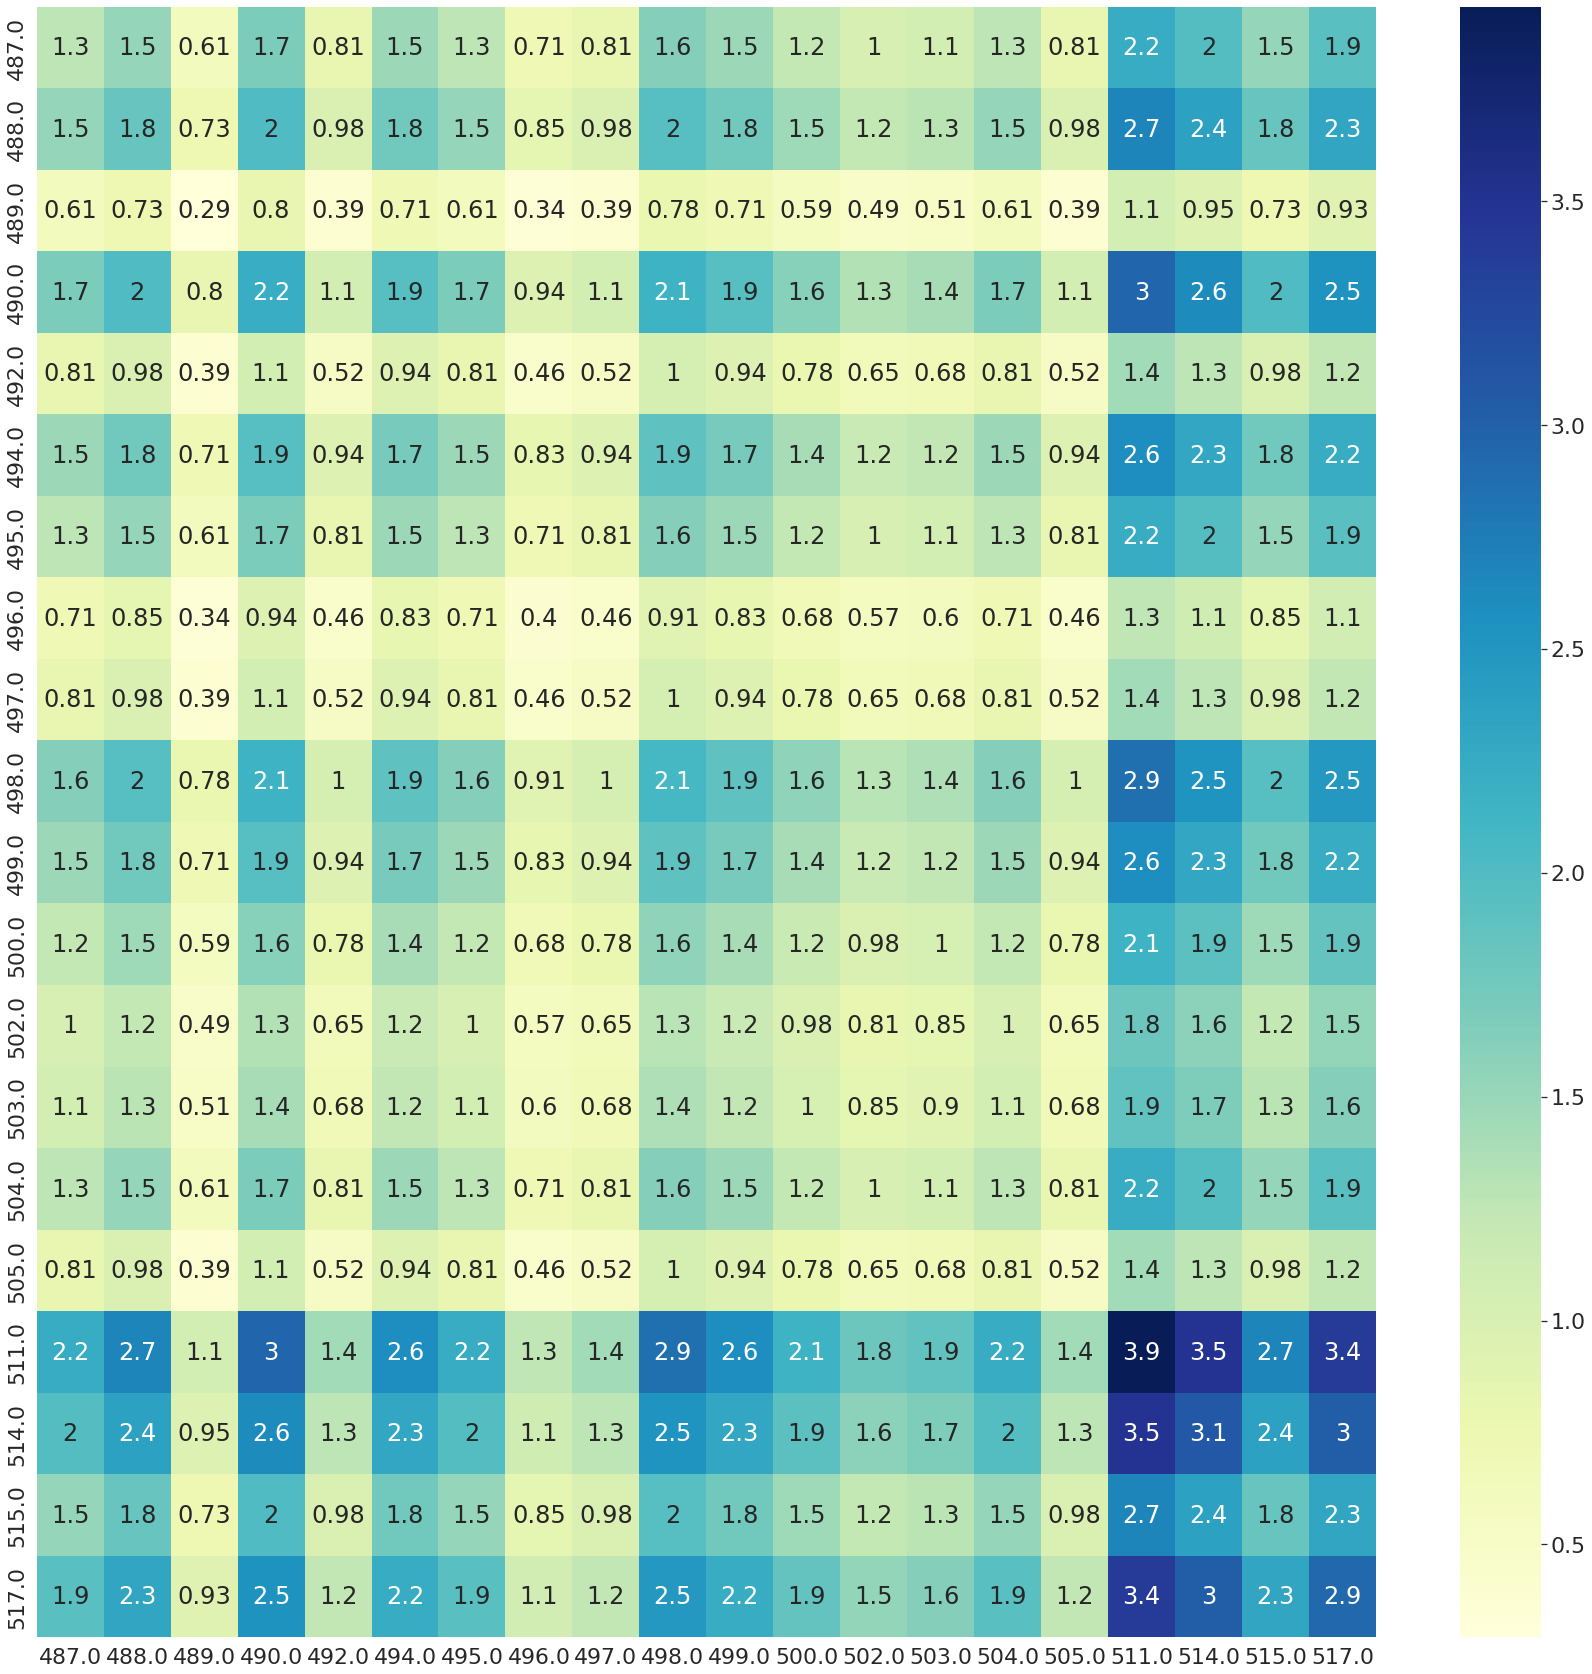

In [41]:
plt.figure(figsize = (30,30))
sns.set(font_scale=2)
figure=sns.heatmap(matrix_goles_away,cmap='YlGnBu',annot=True)